In [10]:
import pandas as pd
file_path = "traffic_accidents.csv"



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



In [9]:
df = pd.read_csv(file_path)
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
data = df[['crash_hour', 'injuries_total']].dropna()
data['crash_hour'] = pd.to_numeric(data['crash_hour'], errors='coerce')
data['injuries_total'] = pd.to_numeric(data['injuries_total'], errors='coerce')
data = data.dropna()
data.describe()


,crash_hour,injuries_total
count,209306.000000,209306.000000
mean,13.373047,0.382717
std,5.603830,0.799720
min,0.000000,0.000000
25%,9.000000,0.000000
50%,14.000000,0.000000
75%,17.000000,1.000000
max,23.000000,21.000000


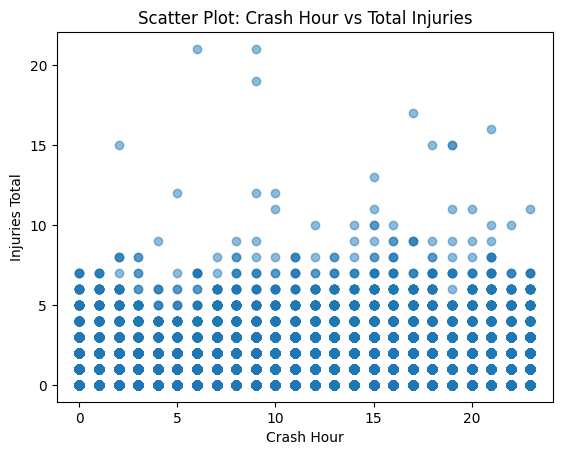

In [ ]:
plt.scatter(data['crash_hour'], data['injuries_total'], alpha=0.5)
plt.title("Scatter Plot: Crash Hour vs Total Injuries")
plt.xlabel("Crash Hour")
plt.ylabel("Injuries Total")
plt.show()


In [ ]:

X = data[['crash_hour']]
y = data['injuries_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 0.41091957687813996
Coefficient: -0.0022222211637371197


Mean Squared Error: 0.6446786432866358
R-squared: 0.000135795236607561


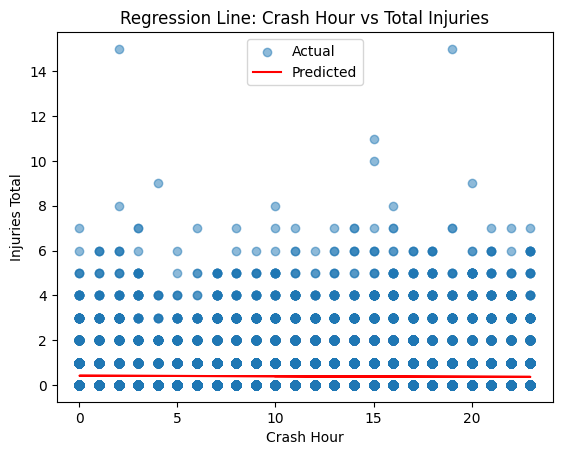

In [ ]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.title("Regression Line: Crash Hour vs Total Injuries")
plt.xlabel("Crash Hour")
plt.ylabel("Injuries Total")
plt.legend()
plt.show()
